In [1]:
from PIL import Image
import pandas as pd
import os
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

In [18]:
import torchvision.transforms as transforms

In [2]:
directory = 'resource'
csv_file = 'pokemon.csv'
csv_path = os.path.join(directory, csv_file)

In [3]:
data_name = pd.read_csv(csv_path)

In [4]:
file = os.listdir('resource/images/')

In [5]:
file_dict = {}
for f in file:
    name, _ = f.split('.')
    file_dict[name] = f

In [6]:
data_name['File'] = data_name['Name'].apply(lambda x: file_dict[x])

In [7]:
data_name

,Name,Type1,Type2,File
0,bulbasaur,Grass,Poison,bulbasaur.png
1,ivysaur,Grass,Poison,ivysaur.png
2,venusaur,Grass,Poison,venusaur.png
3,charmander,Fire,NaN,charmander.png
4,charmeleon,Fire,NaN,charmeleon.png
...,...,...,...,...
804,stakataka,Rock,Steel,stakataka.jpg
805,blacephalon,Fire,Ghost,blacephalon.jpg
806,zeraora,Electric,NaN,zeraora.jpg
807,meltan,Steel,NaN,meltan.jpg


In [8]:
#data_name.to_csv('resource/pokemon_train.csv')

In [9]:
print('File name: ', data_name.iloc[1, 3])
print('Class: ', data_name.iloc[1, 1])

File name:  ivysaur.png
Class:  Grass


In [10]:
image_name = data_name.iloc[1, 3]
image_path = os.path.join('resource/images', image_name)

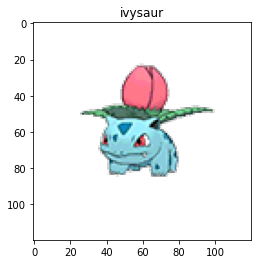

In [11]:
image = Image.open(image_path)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title(data_name.iloc[1, 0])
plt.show()

In [12]:
class Dataset(Dataset):
    def __init__(self, csv_file, data_dir, transform=None):
        self.transform = transform
        
        self.data_dir = data_dir
        data_dircsv_file = os.path.join(self.data_dir, csv_file)
        
        self.data_name = pd.read_csv(data_dircsv_file, index_col=0)
        
        self.len = self.data_name.shape[0]
        
    def __len__(self):
        return self.len
    
    def __getitem__(self, idx):
        
        image_name = os.path.join(self.data_dir, 'images' , self.data_name.iloc[idx, 3])
        image = Image.open(image_name)
        
        y = self.data_name.iloc[idx, 1]

        if self.transform:
            image = self.transform(image)
            
        return image, y

In [14]:
croptensor_data_transform = transforms.Compose([transforms.CenterCrop(50), transforms.ToTensor()])

In [15]:
dataset = Dataset(csv_file='pokemon_train.csv', data_dir='resource', transform=croptensor_data_transform)

In [16]:
x, y = dataset[0]

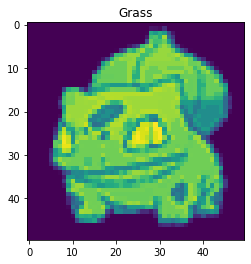

In [17]:
plt.imshow(x.numpy()[0])
plt.title(y)
plt.show()